# Stroke Prediction Dataset 

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from vecstack import stacking
from mlxtend.classifier import StackingClassifier
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [7]:
df= pd.read_csv('Stroke-Dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Already can see a lot of NaN values in columns

In [10]:
df.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Checking the rows count to see if null values can be filled or are too much so they'll be dropped

In [12]:
df.shape

(5110, 12)

### Null values make up only 3.9% of data, so it will be filled instead of dropped

### Visualizing nulls

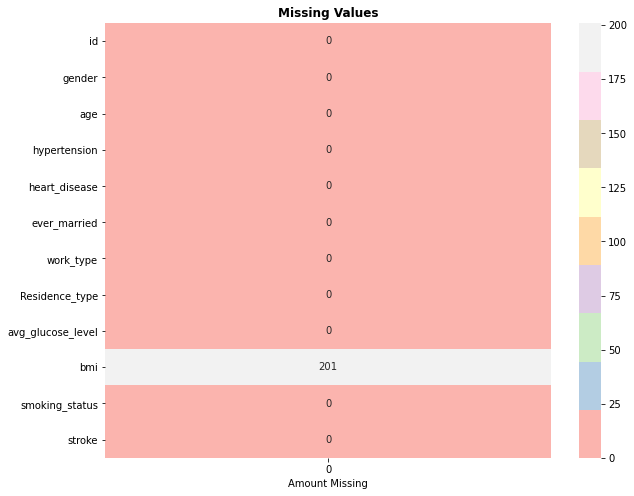

In [13]:
plt.title('Missing Values',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='Pastel1')
ax.set_xlabel('Amount Missing')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Getting missing values (imputing) with KNN algorithm, making it predict the missing values based on the data

In [14]:
imputer= KNNImputer(n_neighbors=5)
df['bmi']=imputer.fit_transform(df[['bmi']])

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
df.drop(['id'], axis= 1, inplace = True) 

### Taking numerical columns from data except our target column then visualizing them to show distribution

In [17]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns
print(numerical)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


In [18]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [19]:
numerical_fixed= numerical.drop(['heart_disease','hypertension'])

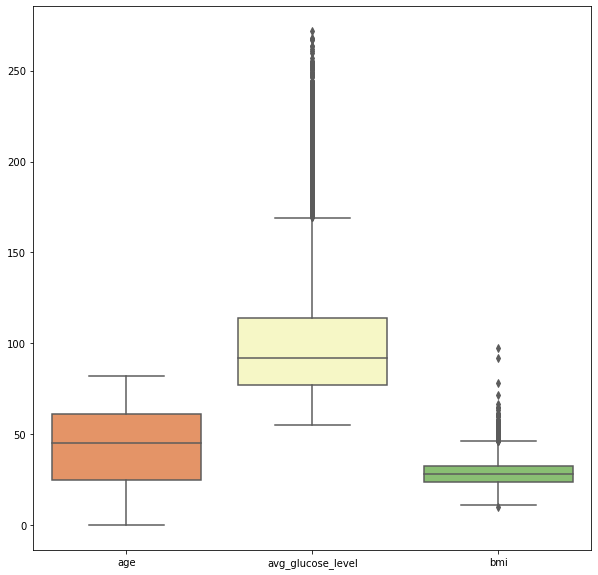

In [20]:
sns.boxplot(data=df[numerical_fixed],palette="RdYlGn") 
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Glucose level and Bmi have positive(right) skewness, which indicates presence of outliers, yet, outliers in this dataset are very useful and would help in predictions

In [21]:
has_stroke = df[df['stroke']==1]

no_stroke = df[df['stroke']==0]

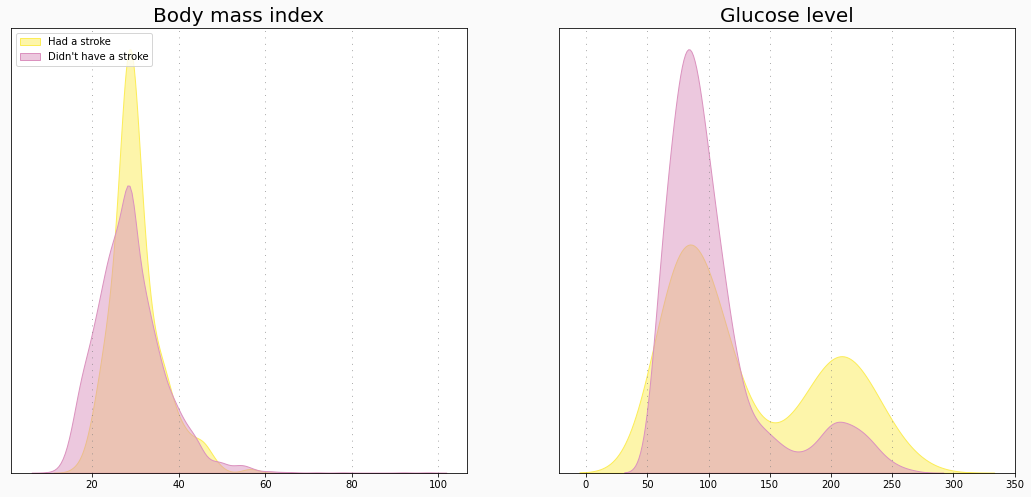

In [22]:
fig = plt.figure(figsize = (18, 18))
fig.patch.set_facecolor('#fafafa')


plt.subplot(221)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('stroke == 1')['bmi'], color = '#fced57', shade = True, label = 'Had a stroke', alpha = 0.5)
sns.kdeplot(df.query('stroke == 0')['bmi'], color = '#db92bf', shade = True, label = "Didn't have a stroke", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Glucose level', size = 20)
sns.kdeplot(df.query('stroke == 1')['avg_glucose_level'], color = '#fced57', shade = True, label = 'Had a stroke', alpha = 0.5)
sns.kdeplot(df.query('stroke == 0')['avg_glucose_level'], color = '#db92bf', shade = True, label = "Didn't have a stroke", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.show()

### In BMI:
   Ranging from 20 to 40, more people said that they had a stroke than the ones that said they              didn't, and rest of the ranges are almost the same.
   
   The distribution and standard deviation is greater in BMI that didn't have a stroke.


In Glucose Level:
   A jump from 0 to almost 50 in that a person with this glucose level had a stroke.
   
   Ranging from 50 to approximately 125, more people said that they didn't have a stroke,
       unlike ranges from 150 onwards that said they had a stroke.

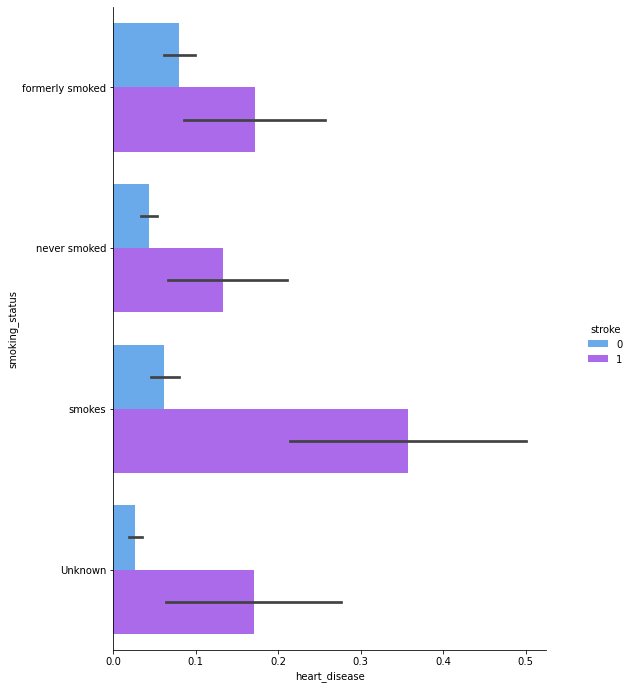

In [23]:
sns.catplot(data=df, x="heart_disease", y="smoking_status", hue="stroke", kind="bar", palette="cool")
fig = plt.gcf()
fig.set_size_inches(10, 10)

### People who usually smoke tend to have a much higher probability of having a heart disease and getting a stroke

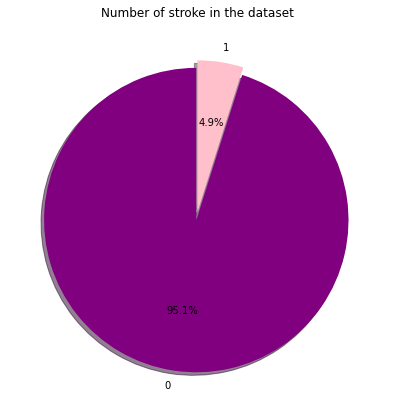

In [24]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["purple","pink"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

### Only 4.9% in the dataset had been through a stroke(imbalanced data alert)

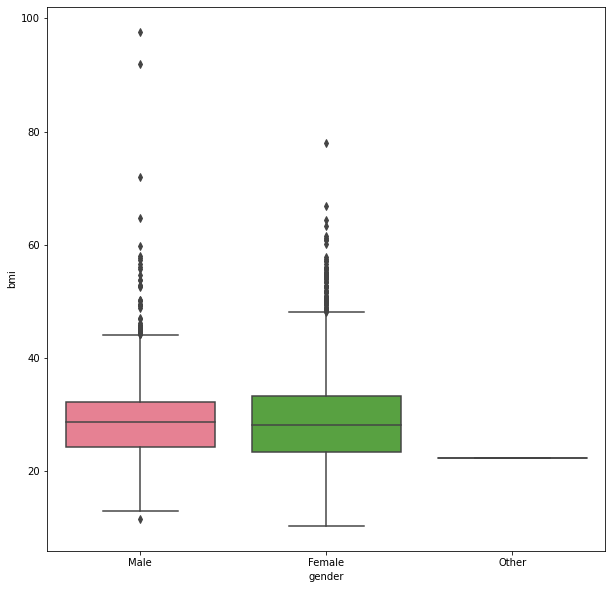

In [25]:
sns.boxplot(x=df['gender'],y=df['bmi'],palette="husl")
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Noticing how the "other" gender has almost no values, so I checked how many rows belong to it

In [26]:
gendr= df[['gender']]

In [27]:
for i in gendr:
    print(df[i].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


### "other" has only one instance, so we're going to drop it

### Our data has more women than men

In [28]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

In [29]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### Combining categorical values and showing their frequencies to see relation with having a stroke

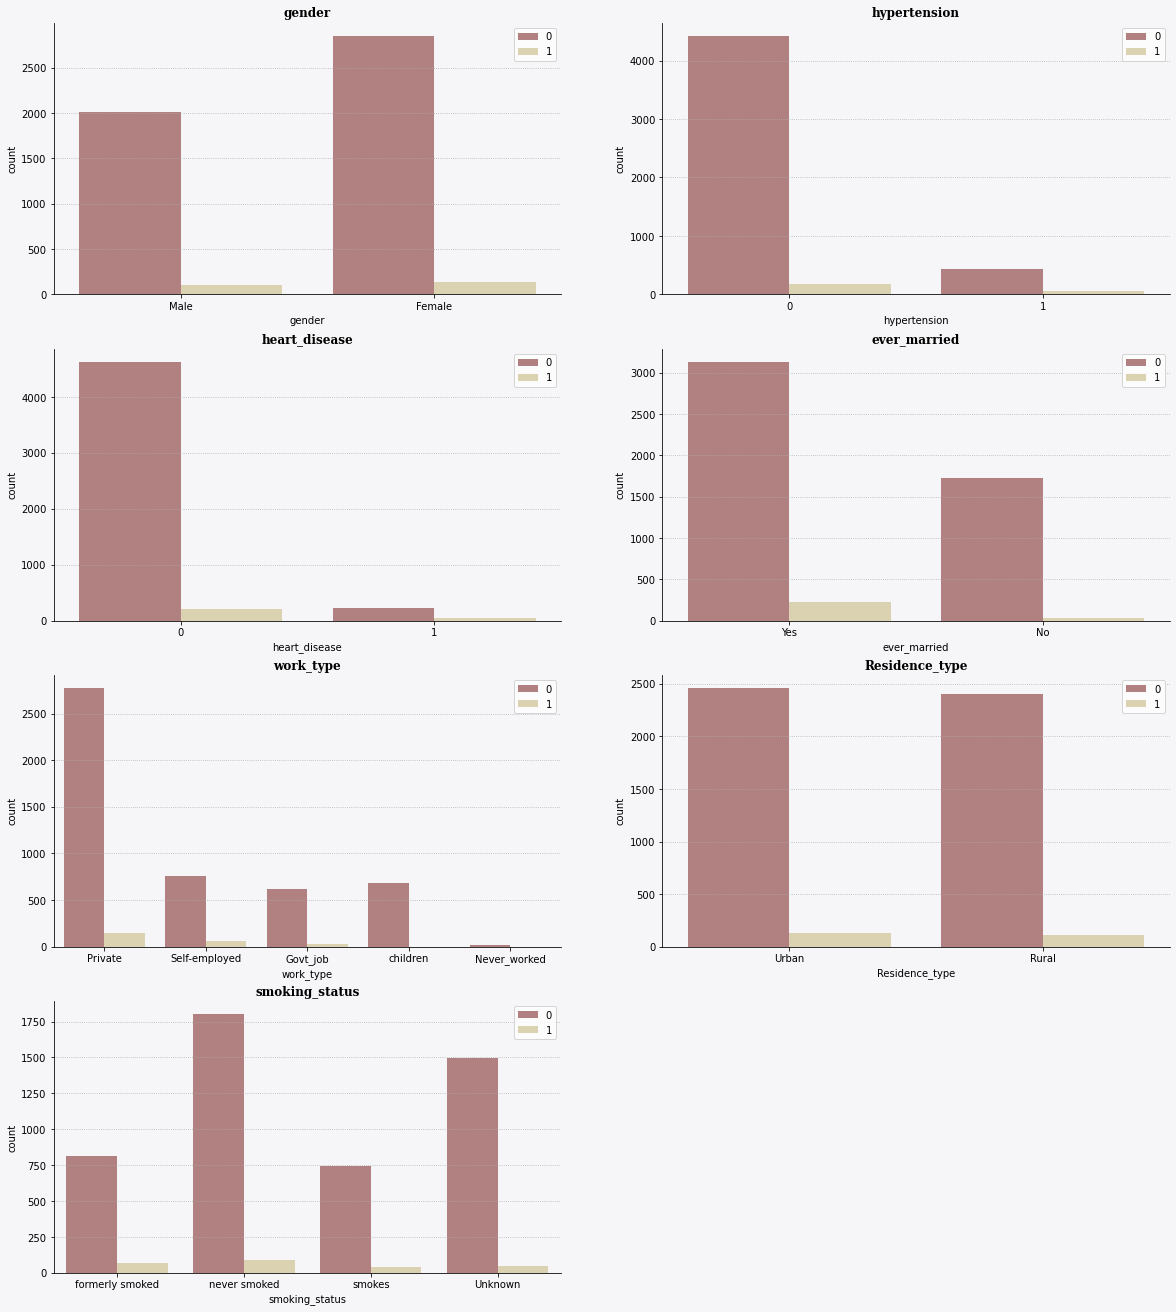

In [30]:
data_cat=df[['gender','hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='pink',hue=df['stroke'])
    plt.legend(loc='upper right')

### Observations :
1) Seems that number of male and female who has stroke are equal in number.

2) The number of people who do not have hypertension almost get no stroke. And people with hypertension also do not show signs of more people with stroke in comparison to the ratio with people who have hypertension and have no stroke.

3) The people with and without heart disease in general do not have much strokes.

4) The people who got married show signs of stroke more than people who are unmarried.

5) Private employees seems to experience stroke more than other work types, unlike self-employed people do show signs of stroke much, and other work types can be ignored.

6) Almost no difference between people living in urban and rural areas in terms of stroke occurence.

7) People who formerly smoked and who smoke (combined) are showing signs of stroke way more than people who never smoked.

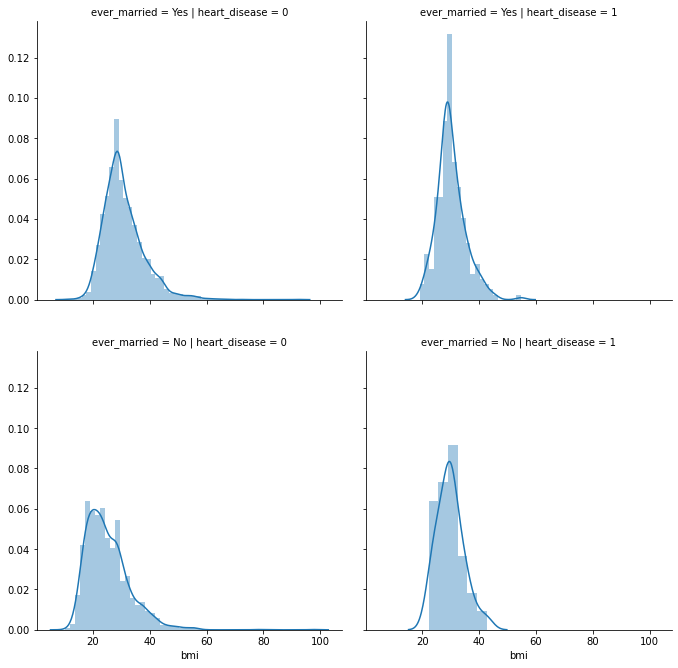

In [31]:
sns.FacetGrid(df, col = 'heart_disease', row = 'ever_married').map(sns.distplot, 'bmi')
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Most density appears in BMI range 20-40 when people were married before and had a heart disease

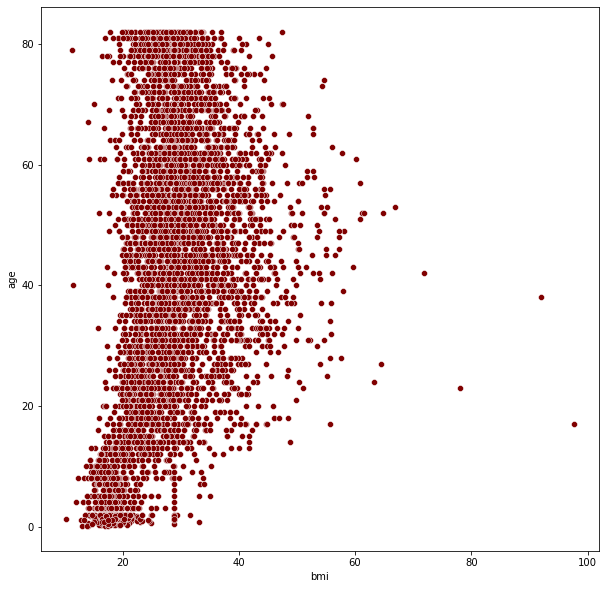

In [32]:
sns.scatterplot(data=df,x='bmi',y='age',color= 'maroon')
fig = plt.gcf()
fig.set_size_inches(10, 10)

### We cant quite visualize how does BMI differ by age, so we would try to put ages into groups to visualize the bmi

In [33]:
age_group=[]
for i in df['age']:
    if i<3:
        age_group.append('Baby')
    elif i>3 and i< 6:
        age_group.append('Toddler')
    elif i>6 and i<13:
        age_group.append('Child')
    elif i>13 and i<=19:
        age_group.append('Teenager')
    elif i>19and i<60:
        age_group.append('Adult')
    else:
        age_group.append('Elder')
df['age_group']=age_group

In [34]:
df['age_group']

0       Elder
1       Elder
2       Elder
3       Adult
4       Elder
        ...  
5105    Elder
5106    Elder
5107    Adult
5108    Adult
5109    Adult
Name: age_group, Length: 5109, dtype: object

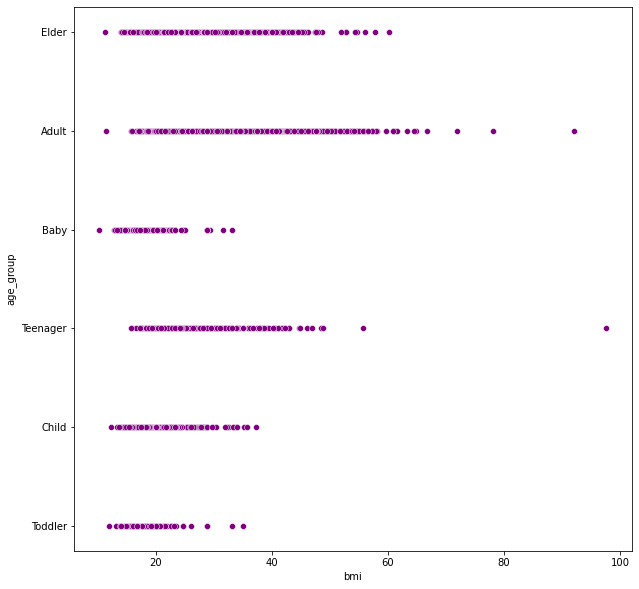

In [35]:
sns.scatterplot(data=df,x='bmi',y='age_group',color= 'purple')
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Now scatterplot is more explained, we can see that adults had the most variability in their BMI distribution.

In [36]:
fig = px.box(df, x="age_group", y="bmi",color="gender")
fig.show()

### Gender statistical distribution is almost the same in all age groups.

### a lot of outliers in glucose levels, so i decided to show it by age group

In [37]:
fig = px.box(df, x="age_group", y="avg_glucose_level",color="gender")
fig.show()

### Male elders had most of the data from glucose level approximately 99 to approximately 186, and hence, more positive skewness than Female elders

In [38]:
df.drop(['age_group'], axis= 1, inplace = True)

In [39]:
def plot_pie_compare(column):
    H = has_stroke[column].value_counts()
    N = no_stroke[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].pie(N,autopct='%1.2f%%',labels=N.index)
    axs[0].title.set_text('No Stroke')
    axs[1].pie(H,autopct='%1.2f%%',labels=H.index)
    axs[1].title.set_text('Has Stroke')
    plt.show()

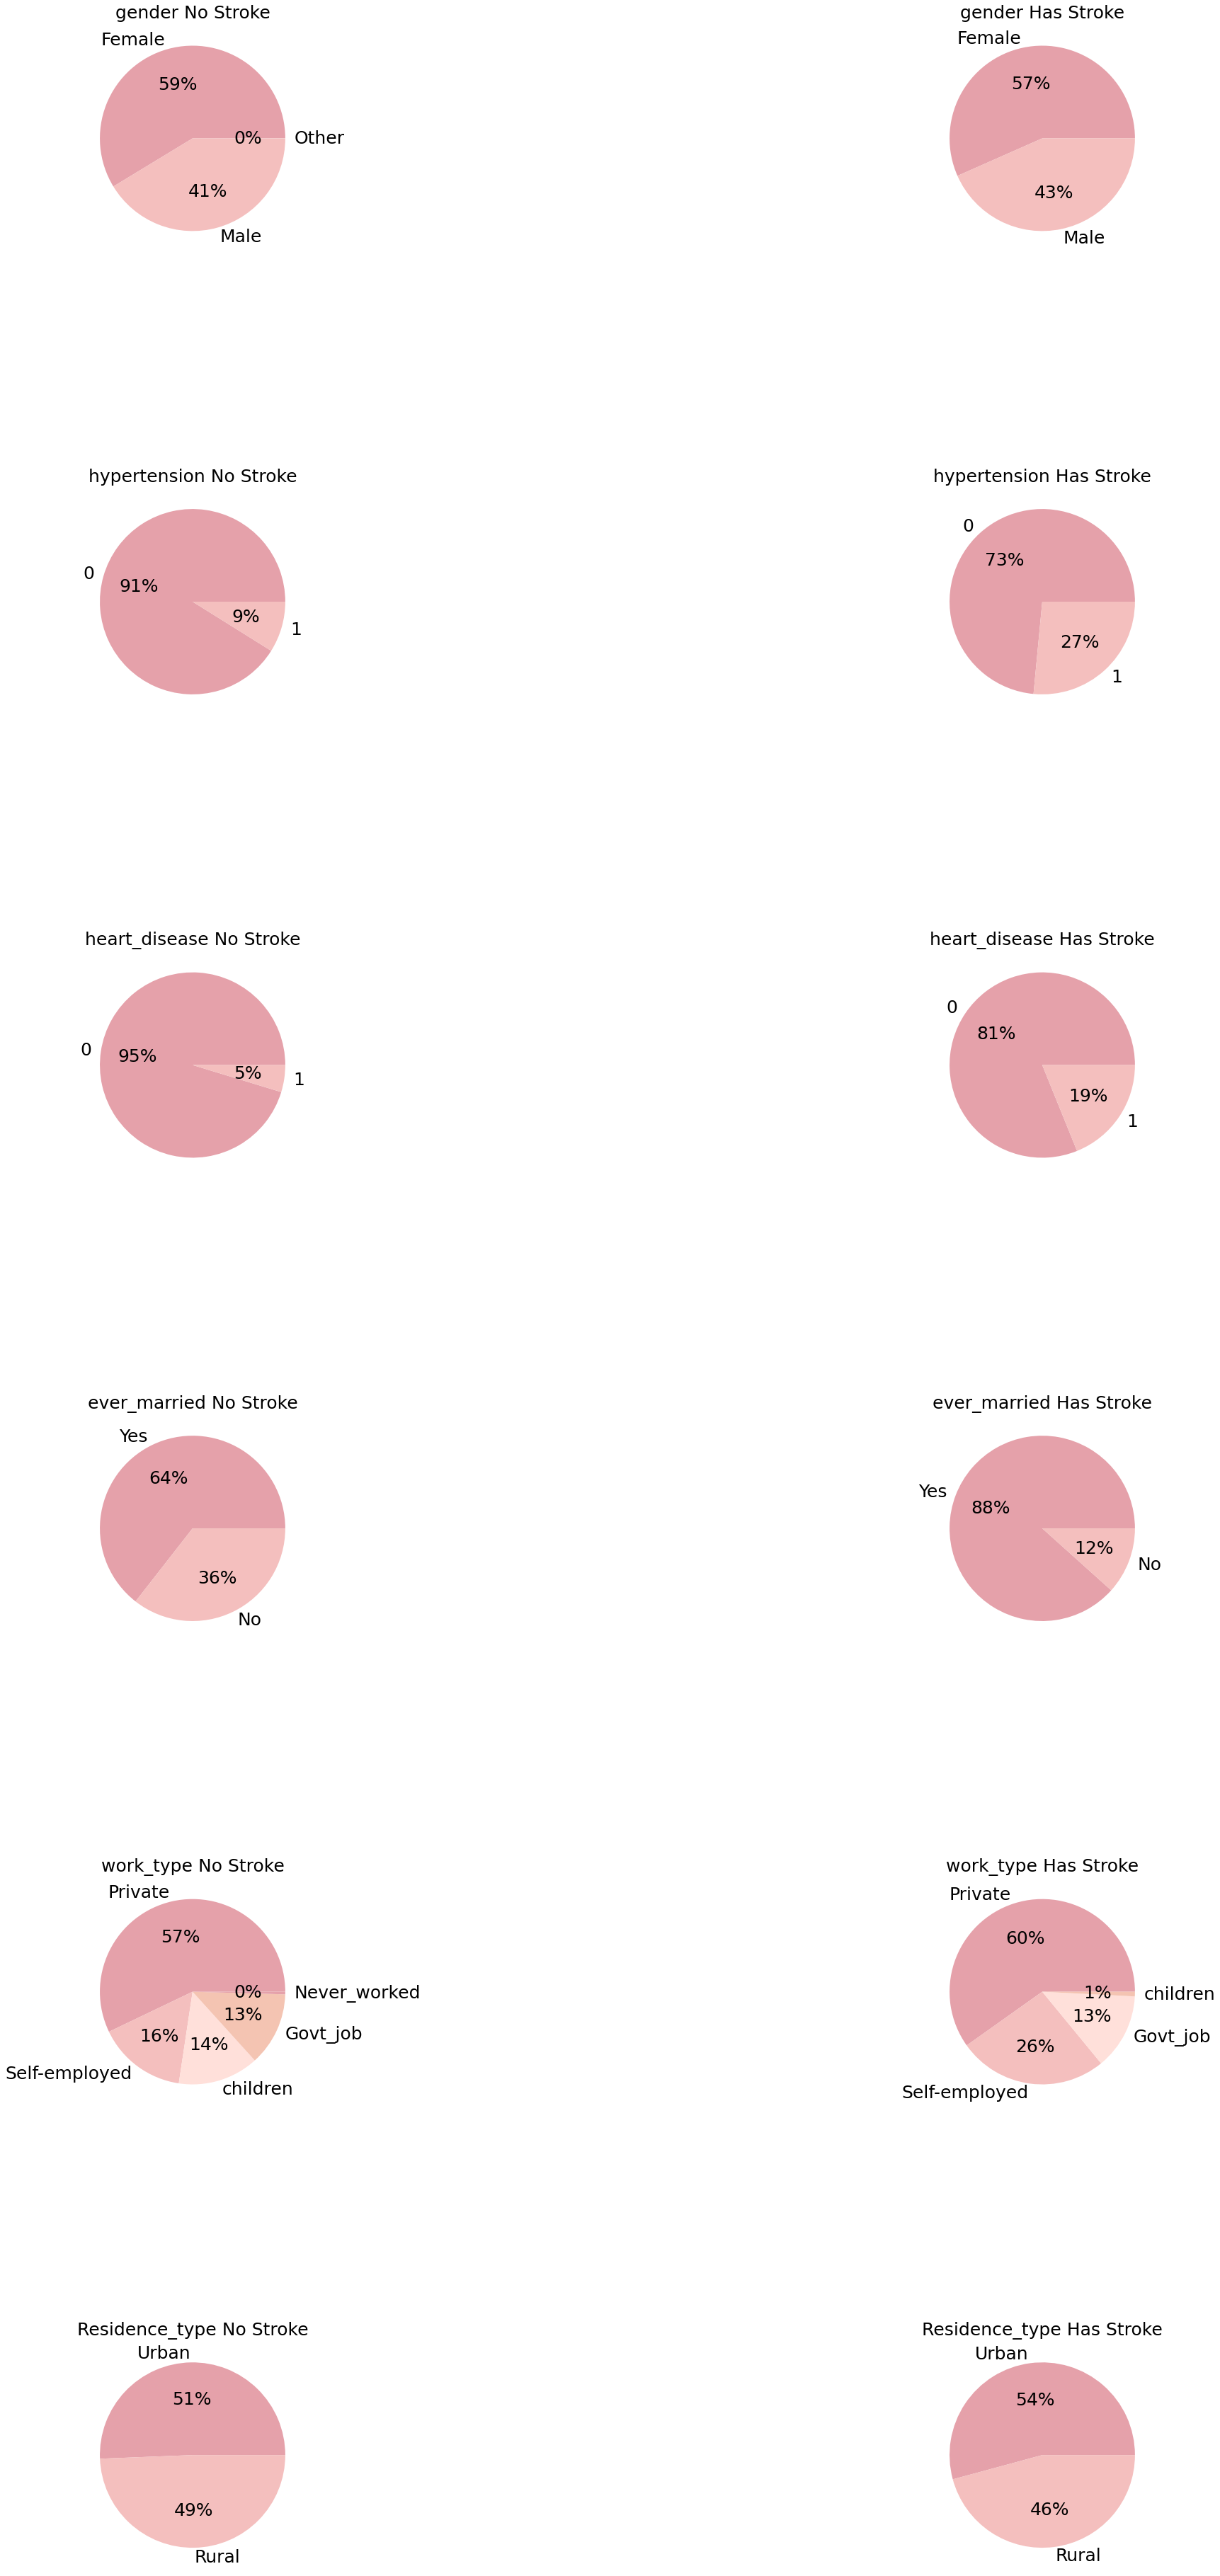

In [40]:
x=df.columns.values
index = [1, 7, 8, 9, 10]
fig,axs = plt.subplots(6,2)
x = np.delete(x, index)
plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=1, hspace=1)
colors = ["#E5A1AA","#F4BFBE","#FFE0DA","#F4C4B2"]
for i in range (len(x)):
    H = has_stroke[x[i]].value_counts()
    N = no_stroke[x[i]].value_counts()
    axs[i, 0].pie(N,autopct='%1.0f%%', labels=N.index, colors=colors, textprops={'fontsize': 25})
    axs[i, 0].set_title(f'{x[i]} No Stroke',fontsize=25)
    axs[i, 1].pie(H,autopct='%1.0f%%', labels=H.index, colors=colors, textprops={'fontsize': 25})
    axs[i, 1].set_title(f'{x[i]} Has Stroke',fontsize=25)
fig = plt.gcf()
#sns.set_context("paper", font_scale=4)
fig.set_size_inches(25, 25)
fig.savefig('test2png.png', dpi=90)
#plt.tight_layout()


### Encoding objects into numerical values, but checking their values first

In [41]:
encoder= LabelEncoder() 

In [42]:
print(pd.unique(df['gender']))   

['Male' 'Female']


In [43]:
print(pd.unique(df['work_type'])) 

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [44]:
print(pd.unique(df['Residence_type'])) 

['Urban' 'Rural']


In [45]:
print(pd.unique(df['ever_married'])) 

['Yes' 'No']


In [46]:
print(pd.unique(df['smoking_status'])) 

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [47]:
df['work_type']= np.where(df['work_type']=='Private',0,np.where(df['work_type']=='Self_employed',1 , np.where(df['work_type']=='Govt_job',2,np.where(df['work_type']=='children',3,4)))) 

In [48]:
df['Residence_type'] = encoder.fit_transform(df["Residence_type"]) 

In [49]:
df['ever_married'] = encoder.fit_transform(df["ever_married"])

In [50]:
df['smoking_status']= np.where(df['smoking_status']=='formerly smoked',0,np.where(df['smoking_status']=='never smoked',1 , np.where(df['smoking_status']=='smokes',2,3))) 

In [51]:
df['gender']= np.where(df['gender']=='Female',0,1) 

In [52]:
df['age'] = df['age'].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   int32  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int32  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int32  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int32(6), int64(3)
memory usage: 488.3 KB


In [54]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0,1,228.69,36.600000,0,1
1,0,61,0,0,1,4,0,202.21,28.893237,1,1
2,1,80,0,1,1,0,0,105.92,32.500000,1,1
3,0,49,0,0,1,0,1,171.23,34.400000,2,1
4,0,79,1,0,1,4,0,174.12,24.000000,1,1


### Histogram to show all features 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>,
        <AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

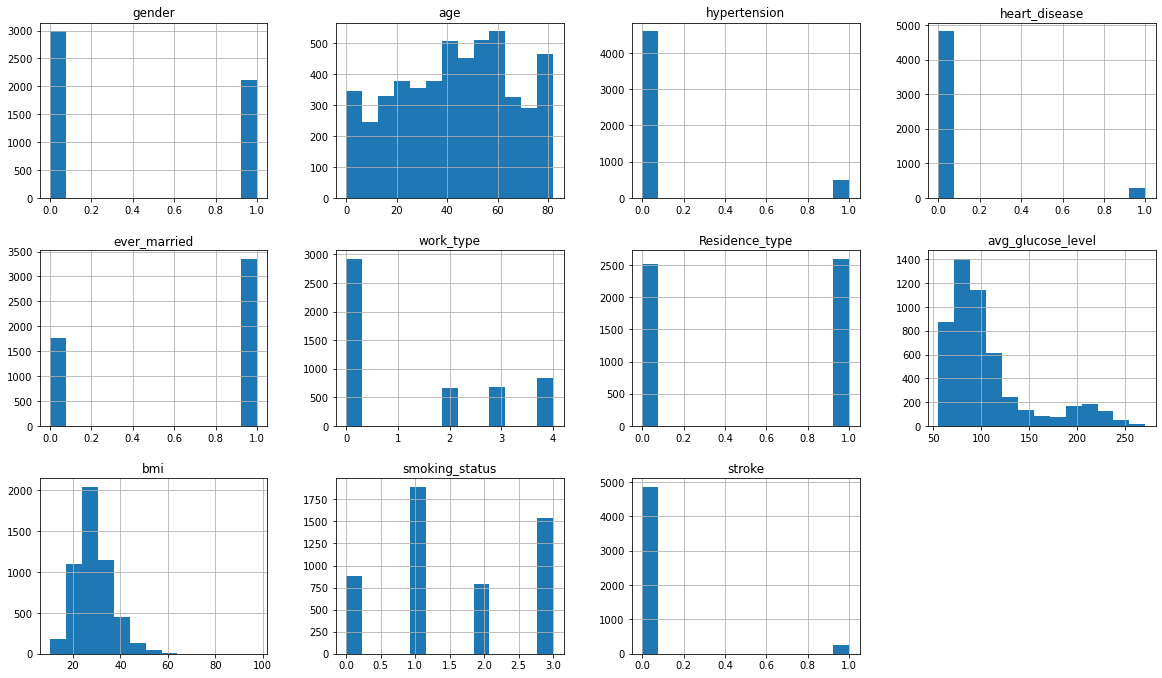

In [55]:
df.hist(bins=13, figsize=(20, 20), layout=(5, 4))

### Creating heatmap to see what features highly correlate with each other and with our target variable

<AxesSubplot:>

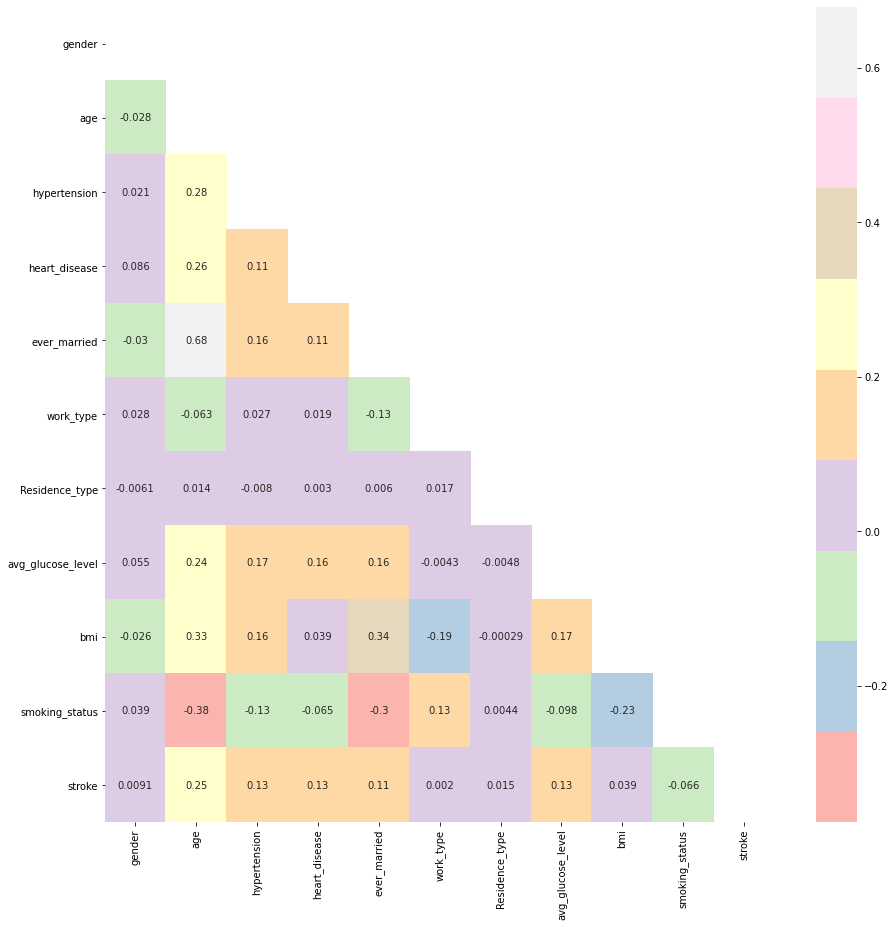

In [56]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='Pastel1')

### We can see that most correlations are low, and 'age' has the highest correlation with stroke occurence

### Splitting and Standardizing dataset

In [57]:
xi= df.iloc[:,0:10]
yi= df.iloc[:,10:]

In [58]:
x_train1, x_test, y_train1, y_test = train_test_split(xi, yi, test_size= 0.3, random_state= 0)

In [59]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test.shape)
print(y_test.shape)

(3576, 10)
(3576, 1)
(1533, 10)
(1533, 1)


In [60]:
x=df.columns.values

In [61]:
standard = StandardScaler().fit_transform(df)
df = pd.DataFrame(standard) 

In [62]:
for i in range(len(x)):
    df = df.rename({i:x[i]}, axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.189791,1.050758,-0.328637,4.184599,0.723678,-0.815141,0.983884,2.706450,1.001041,-1.451829,4.417926
1,-0.840484,0.785653,-0.328637,-0.238972,0.723678,1.656771,-1.016380,2.121652,-0.000165,-0.536327,4.417926
2,1.189791,1.625151,-0.328637,4.184599,0.723678,-0.815141,-1.016380,-0.004867,0.468399,-0.536327,4.417926
3,-0.840484,0.255444,-0.328637,-0.238972,0.723678,-0.815141,0.983884,1.437473,0.715233,0.379174,4.417926
4,-0.840484,1.580967,3.042866,-0.238972,0.723678,1.656771,-1.016380,1.501297,-0.635858,-0.536327,4.417926
...,...,...,...,...,...,...,...,...,...,...,...
5104,-0.840484,1.625151,3.042866,-0.238972,0.723678,-0.815141,0.983884,-0.494481,-0.000165,-0.536327,-0.226351
5105,-0.840484,1.669335,-0.328637,-0.238972,0.723678,1.656771,0.983884,0.420922,1.442744,-0.536327,-0.226351
5106,-0.840484,-0.363133,-0.328637,-0.238972,0.723678,1.656771,-1.016380,-0.511266,0.221565,-0.536327,-0.226351
5107,1.189791,0.343813,-0.328637,-0.238972,0.723678,-0.815141,-1.016380,1.328375,-0.427998,-1.451829,-0.226351


### Starting off with KNN Algorithm 

Accuracy for k= 1 is: 0.92
Accuracy for k= 2 is: 0.95
Accuracy for k= 3 is: 0.94
Accuracy for k= 4 is: 0.95
Accuracy for k= 5 is: 0.95
Accuracy for k= 6 is: 0.95
Accuracy for k= 7 is: 0.95
Accuracy for k= 8 is: 0.95
Accuracy for k= 9 is: 0.95
Accuracy for k= 10 is: 0.95
Accuracy for k= 11 is: 0.95
Accuracy for k= 12 is: 0.95
Accuracy for k= 13 is: 0.95
Accuracy for k= 14 is: 0.95
Accuracy for k= 15 is: 0.95
Accuracy for k= 16 is: 0.95
Accuracy for k= 17 is: 0.95
Accuracy for k= 18 is: 0.95
Accuracy for k= 19 is: 0.95


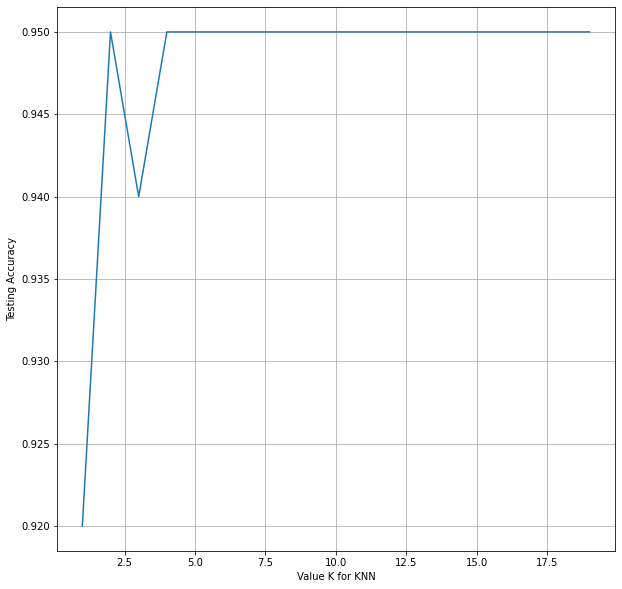

In [63]:
n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train1,y_train1)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))
    
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot(range(1,20),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(10, 10)

Text(51.0, 0.5, 'Actual')

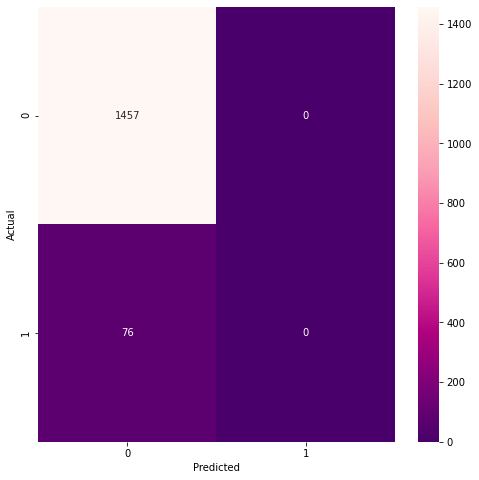

In [64]:
confusion_knn=confusion_matrix(y_test,knn.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True, fmt='g', cmap='RdPu_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [65]:
Accuracy= accuracy_score(y_test, y_pred)
Precision=precision_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
Error=(1-accuracy_score(y_test,y_pred))
Specificity=recall_score(y_test, y_pred, pos_label=0)
print("Accuracy score: ", Accuracy)
print("Precision score: ",Precision) 
print("Recall Score: ",Recall) 
print("Error Rate: ",Error)
print('Specificity : ',Specificity)

Accuracy score:  0.9504240052185258
Precision score:  0.0
Recall Score:  0.0
Error Rate:  0.04957599478147423
Specificity :  1.0


### Accuracy is very high, but model performs poorly due to imbalanced data, which I'll handle by performing undersampling

In [66]:
sm = RandomUnderSampler(random_state=42)
x_train, y_train= sm.fit_resample(x_train1, y_train1)

Accuracy for k= 1 is: 0.7
Accuracy for k= 2 is: 0.81
Accuracy for k= 3 is: 0.7
Accuracy for k= 4 is: 0.78
Accuracy for k= 5 is: 0.7
Accuracy for k= 6 is: 0.76
Accuracy for k= 7 is: 0.69
Accuracy for k= 8 is: 0.74
Accuracy for k= 9 is: 0.7
Accuracy for k= 10 is: 0.73
Accuracy for k= 11 is: 0.69
Accuracy for k= 12 is: 0.72
Accuracy for k= 13 is: 0.68
Accuracy for k= 14 is: 0.71
Accuracy for k= 15 is: 0.68
Accuracy for k= 16 is: 0.71
Accuracy for k= 17 is: 0.68
Accuracy for k= 18 is: 0.71
Accuracy for k= 19 is: 0.69


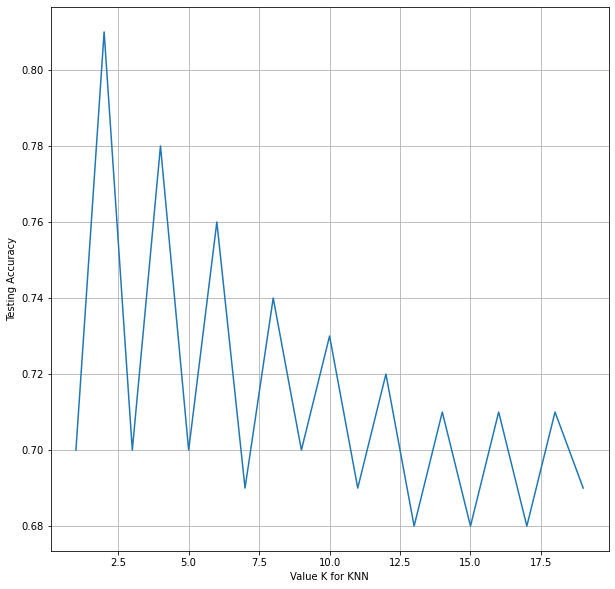

In [67]:
n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))
    
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot(range(1,20),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [68]:
knn=KNeighborsClassifier(n_neighbors=2) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
res_knn= accuracy_score(y_pred,y_test)
print('Accuracy of KNN = ' + str(res_knn))

Accuracy of KNN = 0.8108284409654273


Text(51.0, 0.5, 'Actual')

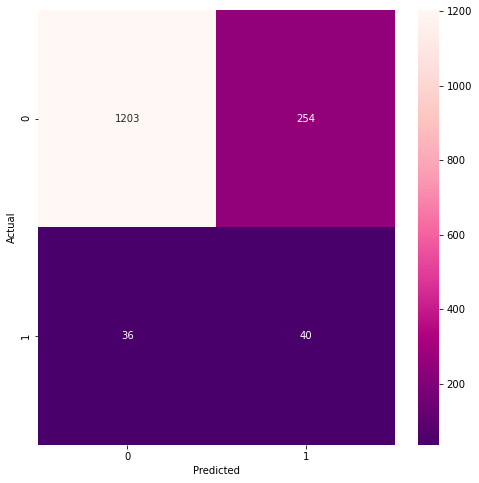

In [69]:
confusion_knn=confusion_matrix(y_test,knn.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True,fmt='g',cmap= 'RdPu_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [70]:
acc_knn= accuracy_score(y_test, y_pred)
pre_knn=precision_score(y_test, y_pred)
re_knn=recall_score(y_test, y_pred)
error_knn=(1-accuracy_score(y_test,y_pred))
spec_knn=recall_score(y_test, y_pred, pos_label=0)
print("Accuracy score: ", acc_knn)
print("Precision score: ",pre_knn) 
print("Recall Score: ",re_knn) 
print("Error Rate: ",error_knn)
print('Specificity : ',spec_knn)

Accuracy score:  0.8108284409654273
Precision score:  0.1360544217687075
Recall Score:  0.5263157894736842
Error Rate:  0.18917155903457272
Specificity :  0.8256691832532601


### Thanks to RandomUnderSampling, now our model is more reliable in its accuracy, due to recall, specifity, and other metrics increasing.

In [71]:
clfknn=KNeighborsClassifier() 
accuracies1 = cross_val_score(clfknn, x_train, y_train, cv = 10)
print(accuracies1)
res_knn_k=format(accuracies1.mean()*100)
print("K-Fold Validation Mean Accuracy= " + res_knn_k)

[0.68571429 0.65714286 0.6        0.71428571 0.77142857 0.77142857
 0.82352941 0.73529412 0.70588235 0.73529412]
K-Fold Validation Mean Accuracy= 72.00000000000001


### Applying K-Fold validation gave us approximately 9% less accuracy.

_______________________________________________________________________________________________________

### Performing Logistic Regression algorithm

In [122]:
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
prediction  = logreg.predict(x_test)    
res_log= logreg.score(x_test, y_test)
print("Logistic Regression accuracy is " + str(round((res_log),2)))

Logistic Regression accuracy is 0.74


Text(51.0, 0.5, 'Actual')

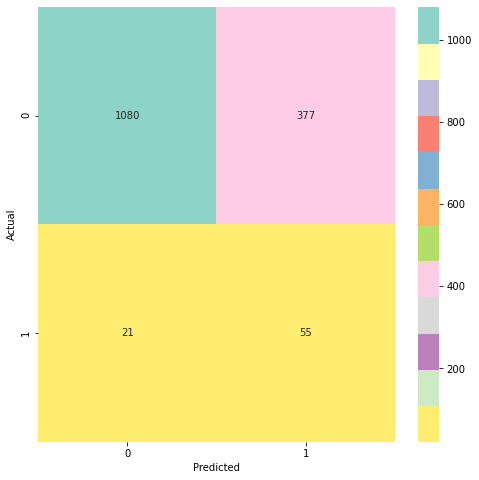

In [73]:
confusion=confusion_matrix(y_test,prediction)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True,fmt='g',cmap= 'Set3_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [74]:
acc_log= accuracy_score(y_test, prediction)
pre_log=precision_score(y_test, prediction)
re_log=recall_score(y_test, prediction)
error_log=(1-accuracy_score(y_test,prediction))
spec_log=recall_score(y_test, prediction, pos_label=0)
print("Accuracy score: ", acc_log)
print("Precision score: ",pre_log) 
print("Recall Score: ",re_log) 
print("Error Rate: ",error_log)
print('Specificity : ',spec_log)

Accuracy score:  0.7403783431180692
Precision score:  0.12731481481481483
Recall Score:  0.7236842105263158
Error Rate:  0.25962165688193084
Specificity :  0.7412491420727523


### Specifity has approximately the same value as accuracy

In [99]:
clfi=LogisticRegression() 
accuracies2 = cross_val_score(clf, x_train, y_train, cv = 10)
print(accuracies2)
res_log_k=accuracies2.mean()*100
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(res_log_k))

[0.74285714 0.74285714 0.62857143 0.77142857 0.74285714 0.85714286
 0.85294118 0.70588235 0.82352941 0.76470588]
K-Fold Validation Mean Accuracy: 76.33 %


### Applying K-Fold validation gave us approximately 2.3% more accuracy.

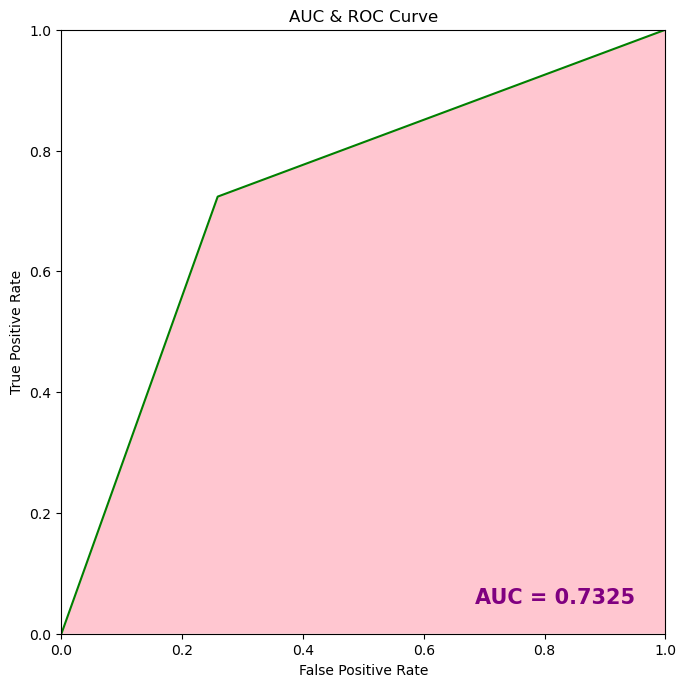

In [76]:
auc = metrics.roc_auc_score(y_test, prediction)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, prediction)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='pink', alpha=0.9)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=15, weight='bold', color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

_______________________________________________________________________________________________________

### Applying Support Vector Machine algorithm

In [77]:
clf = SVC()
clf.fit(x_train, y_train)
pr = clf.predict(x_test)

In [78]:
res_svc= metrics.accuracy_score(y_test, pr)
print("Accuracy:"+ str(res_svc))

Accuracy:0.7077625570776256


Text(51.0, 0.5, 'Actual')

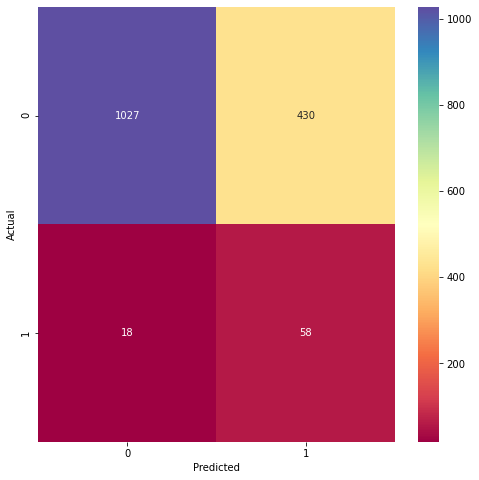

In [79]:
confusion=confusion_matrix(y_test,pr)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True,fmt='g',cmap= 'Spectral')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [80]:
acc_svm= accuracy_score(y_test, pr)
pre_svm=precision_score(y_test, pr)
re_svm=recall_score(y_test, pr)
error_svm=(1-accuracy_score(y_test,pr))
spec_svm=recall_score(y_test, pr, pos_label=0)
print("Accuracy score: ", acc_svm)
print("Precision score: ",pre_svm) 
print("Recall Score: ",re_svm) 
print("Error Rate: ",error_svm)
print('Specificity : ',spec_svm)

Accuracy score:  0.7077625570776256
Precision score:  0.11885245901639344
Recall Score:  0.7631578947368421
Error Rate:  0.2922374429223744
Specificity :  0.7048730267673301


### Recall score is very high, even higher than accuracy, and this indicates our model is working well because it means more positive samples are correctly predicted.

In [81]:
clfsvc=SVC()
accuracies3 = cross_val_score(clfsvc, x_train, y_train, cv = 10)
print(accuracies3)
res_svc_k=accuracies3.mean()*100
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(res_svc_k))

[0.74285714 0.74285714 0.62857143 0.77142857 0.74285714 0.85714286
 0.85294118 0.70588235 0.82352941 0.76470588]
K-Fold Validation Mean Accuracy: 76.33 %


### K-fold made the algorithm increase approximately 6.3% in accuracy

_______________________________________________________________________________________________________

### Applying Decision Tree algorithm

In [247]:
non_pruned = tree.DecisionTreeClassifier()  
non_pruned.fit(x_train, y_train)   
m1=non_pruned.predict(x_test)   
res_dt_n= accuracy_score(y_test, m1)
print("score:{}".format(round(res_dt_n,2)))

score:0.75


Text(51.0, 0.5, 'Actual')

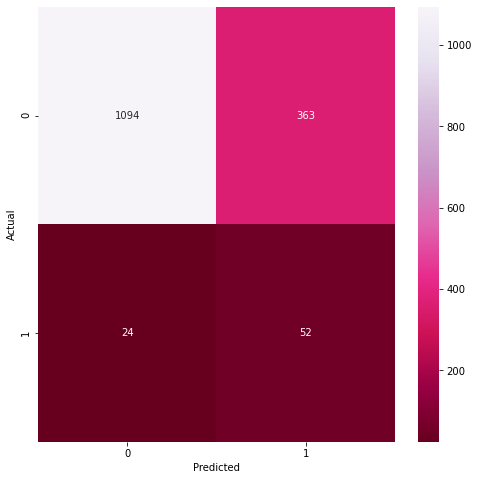

In [248]:
confusion=confusion_matrix(y_test,m1)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True,fmt='g',cmap= 'PuRd_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [250]:
acc_dt= accuracy_score(y_test, m1)
pre_dt=precision_score(y_test, m1)
re_dt=recall_score(y_test, m1)
error_dt=(1-accuracy_score(y_test,m1))
spec_dt=recall_score(y_test, m1, pos_label=0)
print("Accuracy score: ", acc_dt)
print("Precision score: ",pre_dt) 
print("Recall Score: ",re_dt) 
print("Error Rate: ",error_dt)
print('Specificity : ',spec_dt)

Accuracy score:  0.7475538160469667
Precision score:  0.12530120481927712
Recall Score:  0.6842105263157895
Error Rate:  0.2524461839530333
Specificity :  0.7508579272477693


### Specifity is higher than accuracy, which means more true negative samples were predicted correctly.

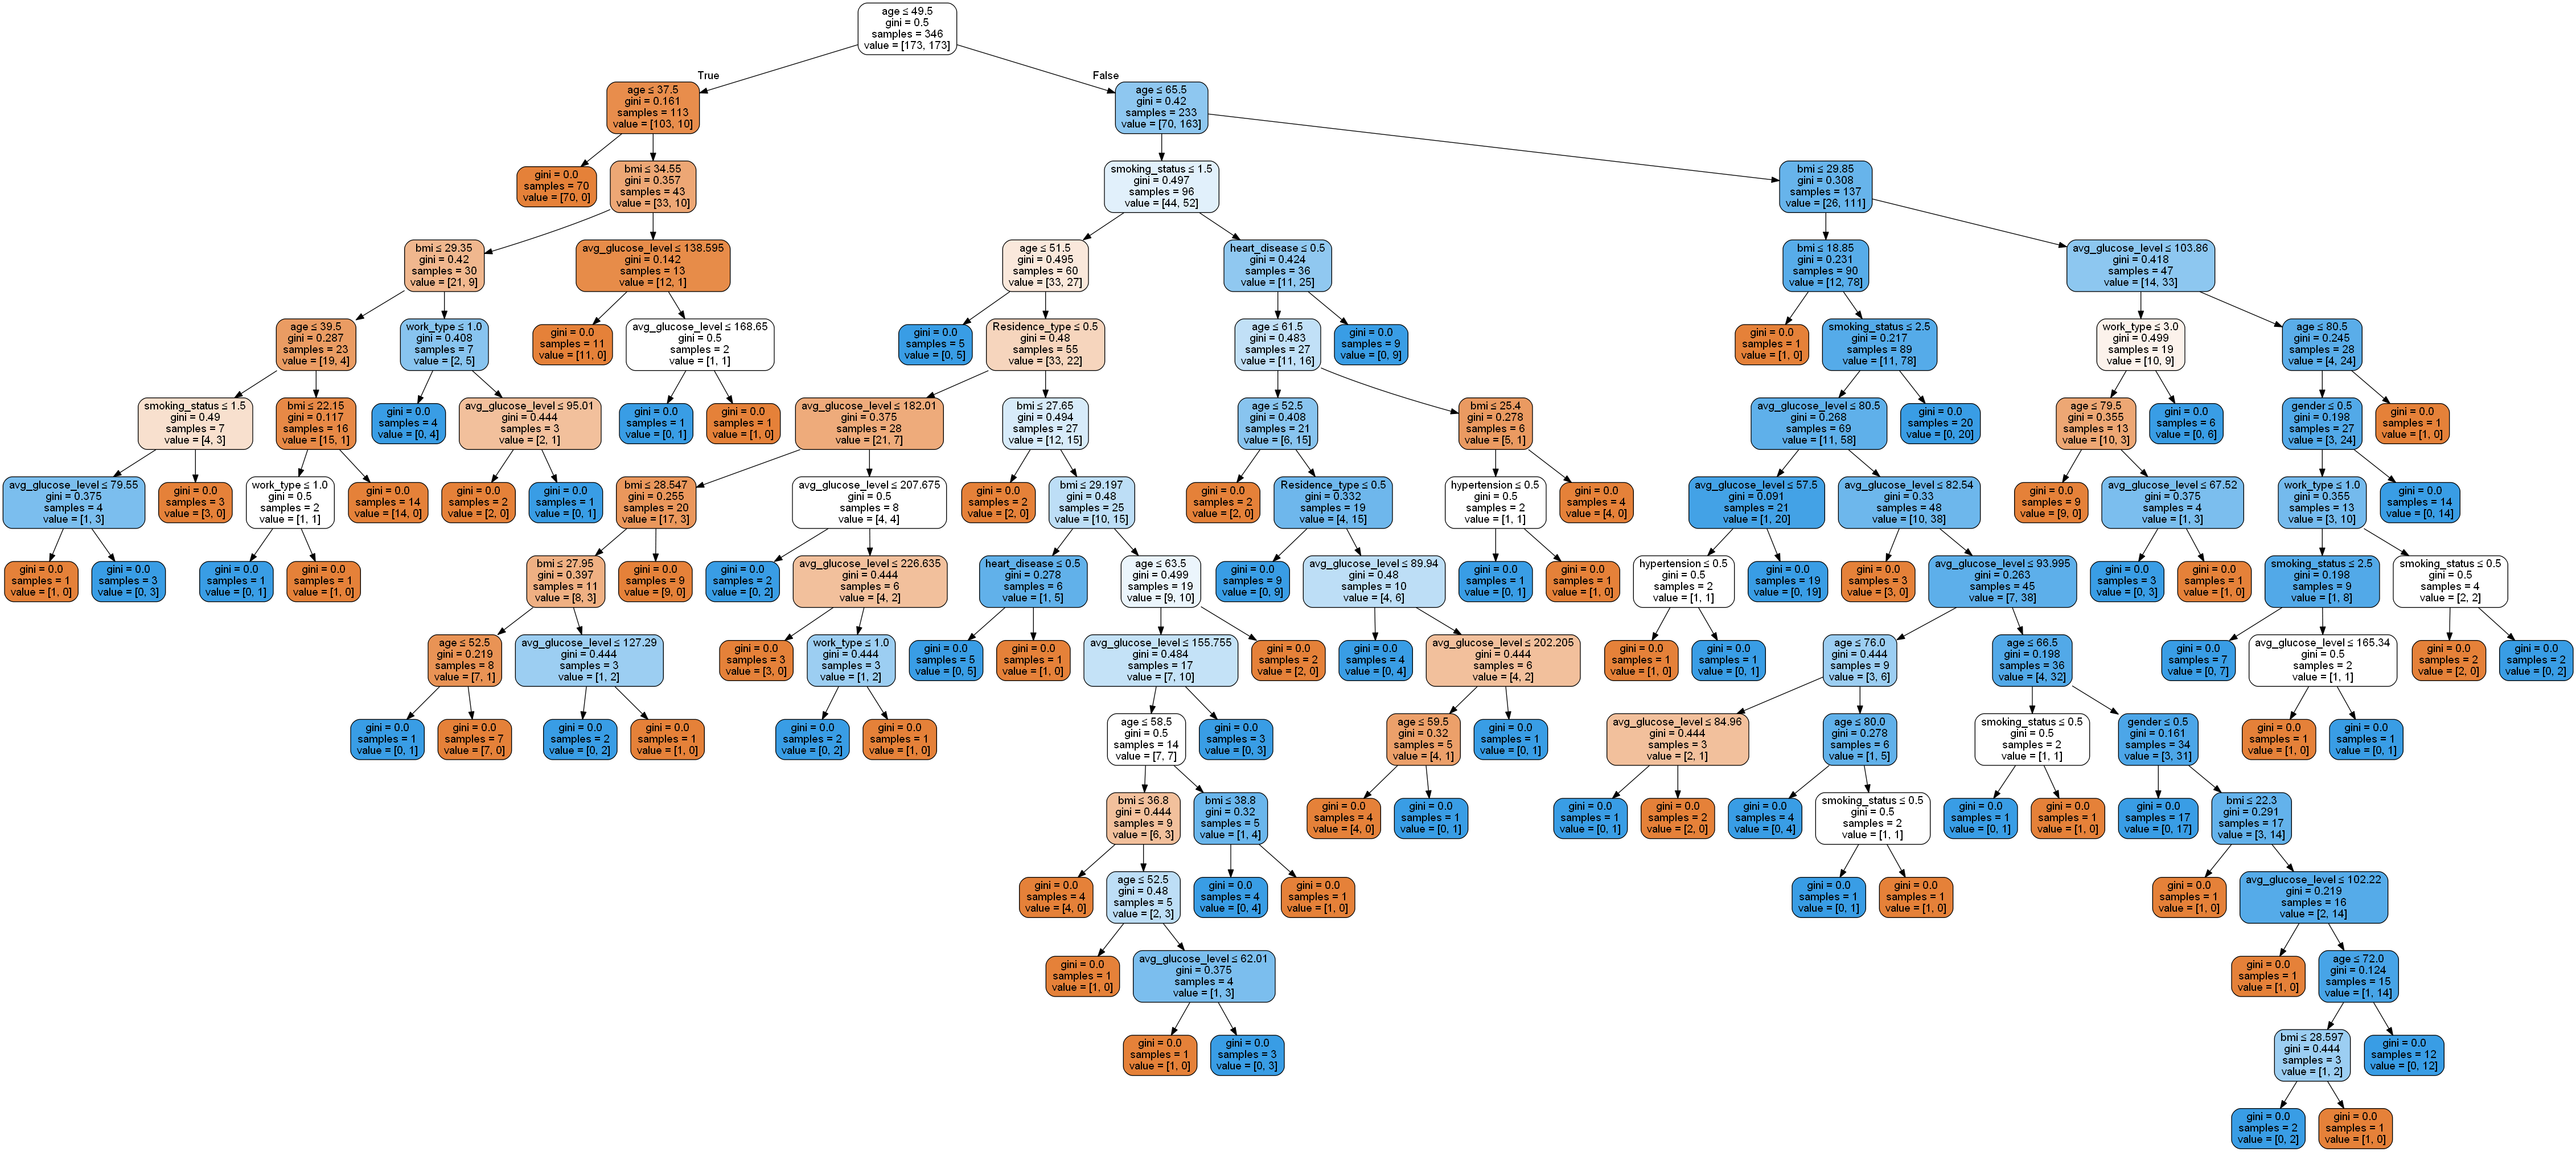

In [251]:
Names=list(xi.columns.values)
dot_data = tree.export_graphviz(non_pruned, out_file=None, filled=True, rounded=True,special_characters=True,feature_names= Names)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [332]:
pruned = tree.DecisionTreeClassifier(criterion='gini', splitter= 'random', max_leaf_nodes=20,min_samples_leaf=15, max_depth=5) 
pruned.fit(x_train, y_train)   
m2=pruned.predict(x_test)  
res_dt_p=accuracy_score(y_test, m2)
print("score:{}".format(round(res_dt_p,2)))

score:0.85


Text(51.0, 0.5, 'Actual')

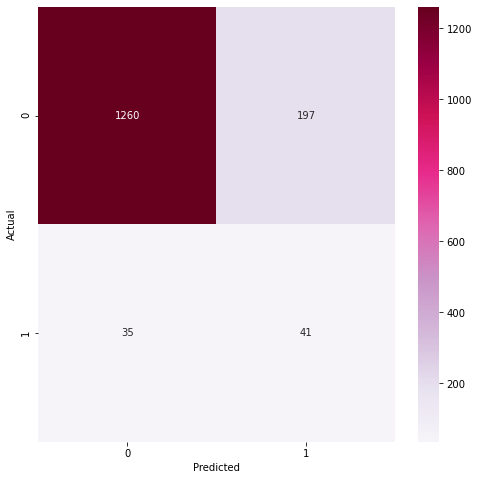

In [333]:
confusion=confusion_matrix(y_test,m2)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True,fmt='g',cmap= 'PuRd')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [334]:
acc_dt_p= accuracy_score(y_test, m2)
pre_dt_p=precision_score(y_test, m2)
re_dt_p=recall_score(y_test, m2)
error_dt_p=(1-accuracy_score(y_test,m2))
spec_dt_p=recall_score(y_test, m2, pos_label=0)
print("Accuracy score: ", acc_dt_p)
print("Precision score: ",pre_dt_p) 
print("Recall Score: ",re_dt_p) 
print("Error Rate: ",error_dt_p)
print('Specificity : ',spec_dt_p)

Accuracy score:  0.8486627527723418
Precision score:  0.1722689075630252
Recall Score:  0.5394736842105263
Error Rate:  0.15133724722765818
Specificity :  0.8647906657515443


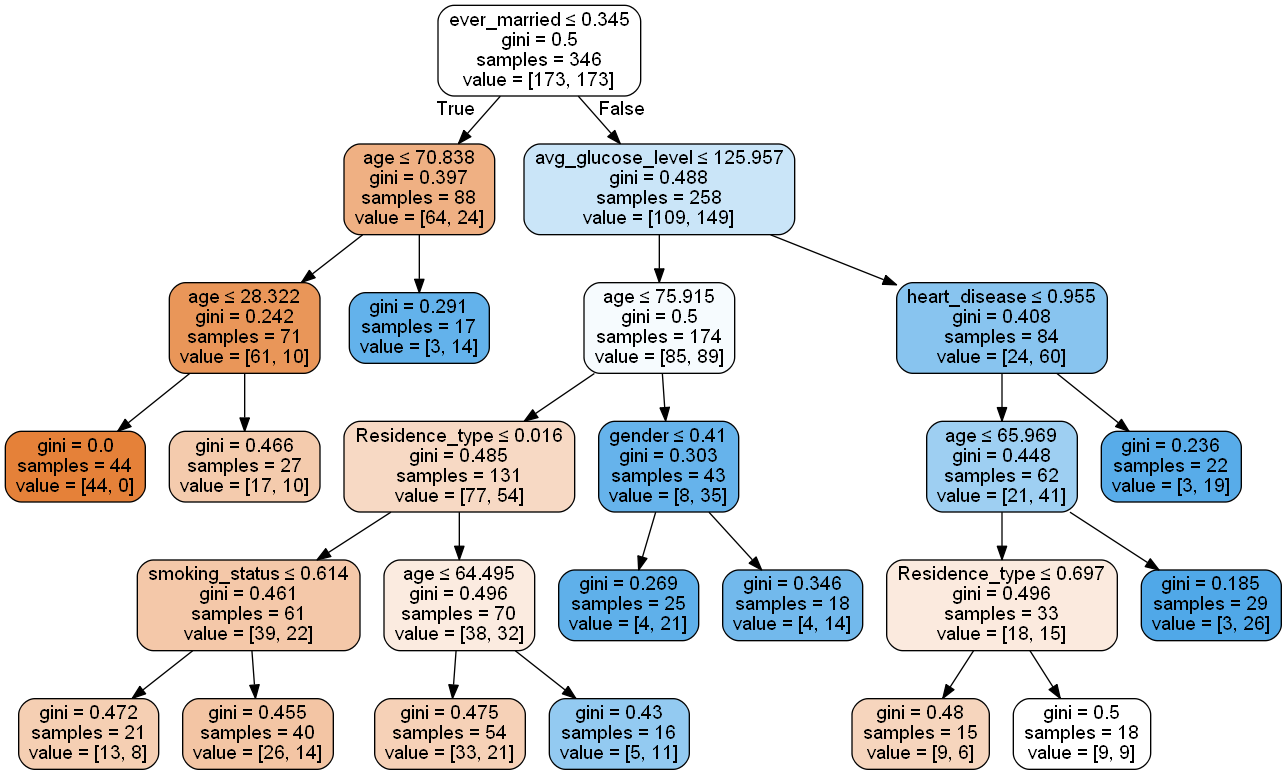

In [335]:
Names=list(xi.columns.values)
dot_data = tree.export_graphviz(pruned, out_file=None, filled=True, rounded=True,special_characters=True,feature_names= Names)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Pruned made the accuracy increase approximately 10%

In [361]:
clfDTK=DecisionTreeClassifier()
accuracies4 = cross_val_score(clfDT, x_train, y_train, cv = 10)
print(accuracies4)
res_dt_k=accuracies4.mean()*100
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(res_dt_k))

[0.68571429 0.68571429 0.71428571 0.88571429 0.68571429 0.71428571
 0.70588235 0.70588235 0.73529412 0.76470588]
K-Fold Validation Mean Accuracy: 72.83 %


### K-fold is less than pruned/non-pruned accuracy

_______________________________________________________________________________________________________

### Applying Random Forest algorithm.

In [461]:
clfRF=RandomForestClassifier(n_estimators=100)  
clfRF.fit(x_train, y_train)  
m4=clfRF.predict(x_test)
res_rf= metrics.accuracy_score(y_test, m4)
print(res_rf)

0.7436399217221135


Text(51.0, 0.5, 'Actual')

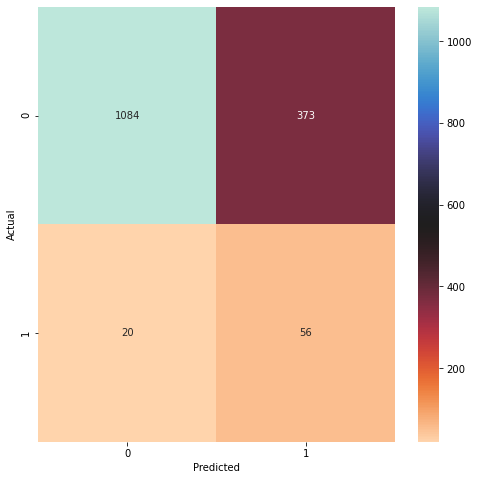

In [462]:
confusion=confusion_matrix(y_test,m4)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True,fmt='g',cmap= 'icefire_r')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [463]:
acc_rf= accuracy_score(y_test, m4)
pre_rf=precision_score(y_test, m4)
re_rf=recall_score(y_test, m4)
error_rf=(1-accuracy_score(y_test,m4))
spec_rf=recall_score(y_test, m4, pos_label=0)
print("Accuracy score: ", acc_rf)
print("Precision score: ",pre_rf) 
print("Recall Score: ",re_rf) 
print("Error Rate: ",error_rf)
print('Specificity : ',spec_rf)

Accuracy score:  0.7436399217221135
Precision score:  0.13053613053613053
Recall Score:  0.7368421052631579
Error Rate:  0.25636007827788654
Specificity :  0.7439945092656143


### Specifity is almost the same as accuracy

In [110]:
clfRFk=RandomForestClassifier()
accuracies5 = cross_val_score(clfRF, x_train, y_train, cv = 10)
print(accuracies5)
res_rf_k=accuracies5.mean()*100
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(res_rf_k))

[0.74285714 0.8        0.65714286 0.74285714 0.68571429 0.88571429
 0.79411765 0.70588235 0.76470588 0.79411765]
K-Fold Validation Mean Accuracy: 75.73 %


### K-Fold made the accuracy jump approximately 1.5%

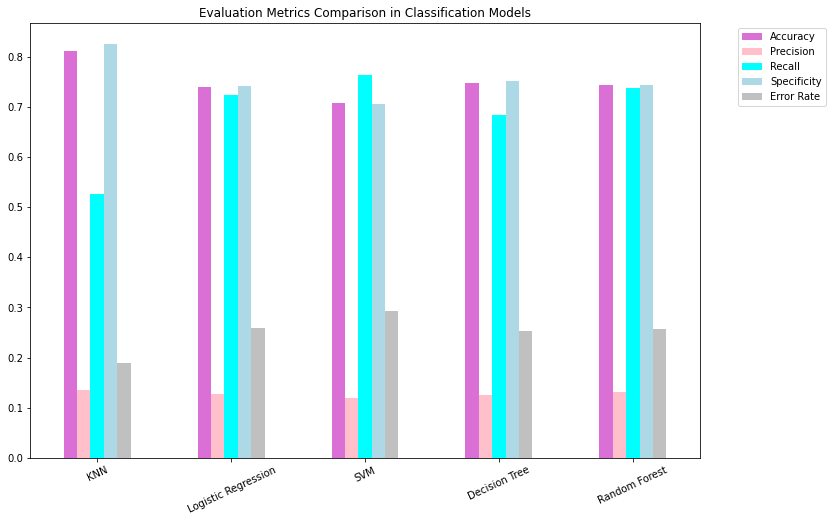

In [464]:
data={"Accuracy":[acc_knn,acc_log, acc_svm, acc_dt, acc_rf],
     "Precision":[pre_knn, pre_log, pre_svm, pre_dt, pre_rf],
     "Recall":[re_knn, re_log, re_svm, re_dt, re_rf],
     "Specificity":[spec_knn, spec_log, spec_svm, spec_dt, spec_rf],
     "Error Rate":[error_knn, error_log, error_svm, error_dt, error_rf]};
index=["KNN"," Logistic Regression", "SVM", "Decision Tree", "Random Forest"];
dataframe=pd.DataFrame(data=data,index=index);
dataframe.plot.bar(rot=25,title="Evaluation Metrics Comparison in Classification Models",color=['orchid','pink','aqua','lightblue','silver'])
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [465]:
data={'Model': ['Logistic Regression with CV', 'KNN with CV',  "SVM with CV",'Random Forest with CV', 'DecisionTree with CV'], "Score": [float(res_log_k), float(res_knn_k), float(res_rf_k),float(res_svc_k), float(res_dt_k)]}

In [466]:
dataPer = pd.DataFrame(data)

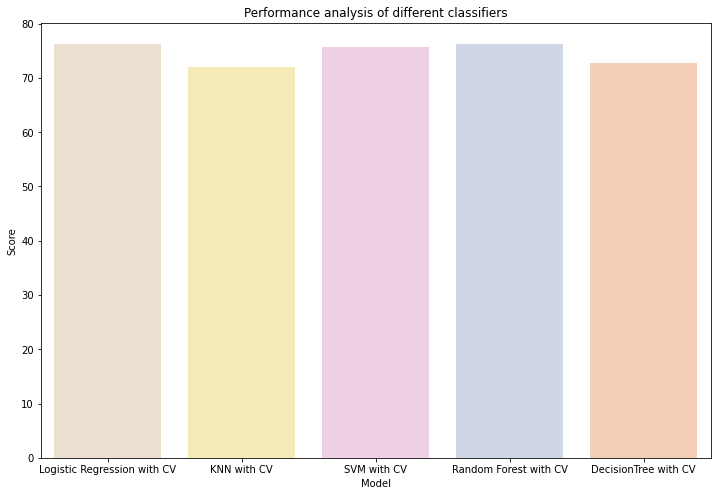

In [467]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=dataPer, palette="Pastel2_r")
plt.title('Performance analysis of different classifiers')
plt.show()

### Most accuracies were the same with K-Fold, topping them Logistic Regression, SVM, Random Forest